In [10]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head(7)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8


In [13]:
df.shape


(200, 5)

In [14]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

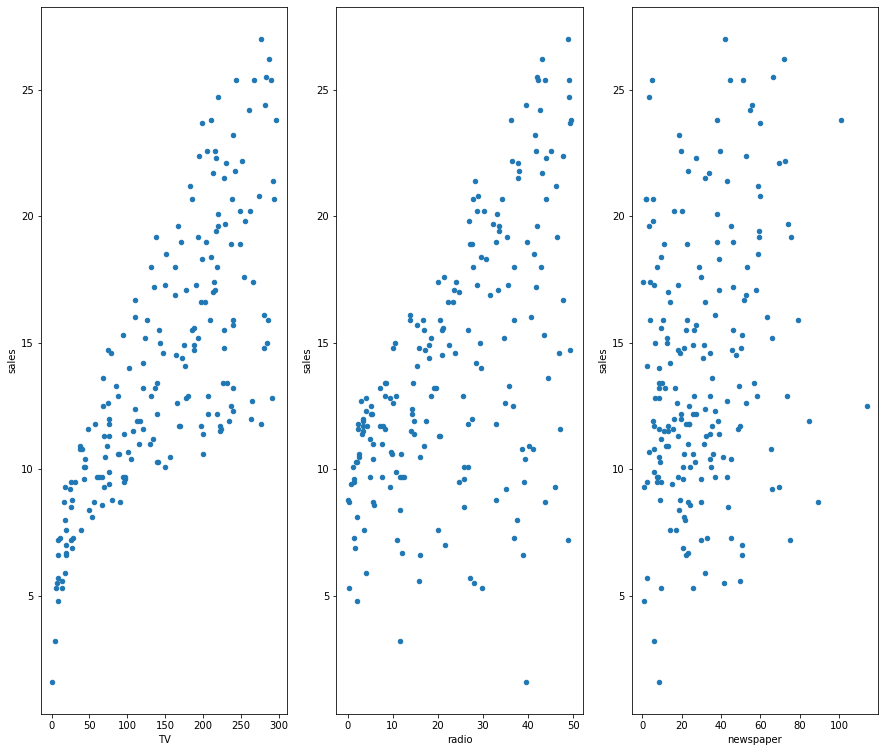

In [22]:
fig, axs=plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(15,13))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [28]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x=df[['sales']]
y=df.sales
lr.fit(x,y)

LinearRegression()

In [44]:
print('TV: ->' ,lr.coef_[0])
print('radio: ->',lr.coef_[0])
print('newspaper:->', lr.coef_[0])
print('Intercept:->',lr.intercept_)

TV: -> 0.9999999999999998
radio: -> 0.9999999999999998
newspaper:-> 0.9999999999999998
Intercept:-> 3.552713678800501e-15


In [53]:
import statsmodels.formula.api as smf
lr=smf.ols('sales~TV+newspaper+radio',data=df).fit()
lr.conf_int()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        00:24:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
lr=smf.ols('sales~TV+newspaper+radio',data=df).fit()
lr.rsquared

0.8972106381789522